# Atividade 03 - Descida de gradiente e taxa de aprendizado

- Alterar o código de Aurélien Géron feito para o livro Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition (https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb):
  - Mudar o problema de regressão para classificação.
  - Criar várias bases para classificação binária.
  - Usar o SGDClassifier do scikit-learn.
  - Plotar os gráficos da descida de gradiente para cada base gerada, para pelo menos três valores de taxa de aprendizado:
    - muito pequena, de forma que o gradiente fique tão lento que não chegue próximo aos valores ótimos;
    - muito grande, de forma que o gradiente divirja;
    - um bom valor para que o gradiente chegue próximo aos valores ótimos.

In [1]:
%matplotlib inline

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Dados para classificação
X1, y1 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X2, y2 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1)
X3, y3 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=29)
X4, y4 = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=1985)

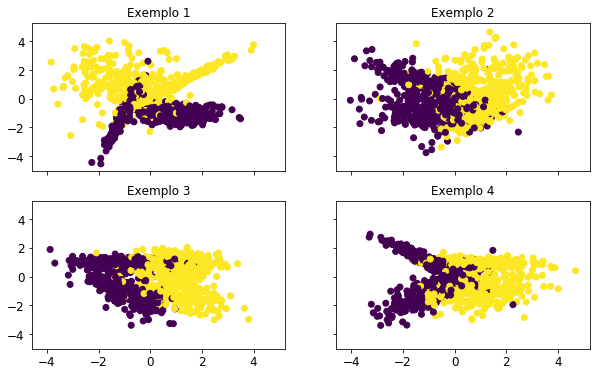

In [3]:
# VISUALIZAÇÃO

# Monta uma gráfico com 4 posições (2 x 2)
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

# Seta algura e largura do gráfico
fig.set_figheight(6)
fig.set_figwidth(10)

# Plota os dados
axs[0, 0].scatter(X1[:,0], X1[:,1], c=y1)
axs[0, 0].set_title('Exemplo 1')

axs[0, 1].scatter(X2[:,0], X2[:,1], c=y2)
axs[0, 1].set_title('Exemplo 2')

axs[1, 0].scatter(X3[:,0], X3[:,1], c=y3)
axs[1, 0].set_title('Exemplo 3')

axs[1, 1].scatter(X4[:,0], X4[:,1], c=y4)
axs[1, 1].set_title('Exemplo 4')

plt.show()

In [4]:
from sklearn.linear_model import SGDClassifier

clf_com_eta_pequeno = SGDClassifier(learning_rate='constant', 
                    eta0=0.01,
                    random_state=1,
                    warm_start=True)

clf_com_eta_medio = SGDClassifier(learning_rate='constant', 
                    eta0=0.1,
                    random_state=1,
                    warm_start=True)

clf_com_eta_grande = SGDClassifier(learning_rate='constant', 
                    eta0=0.5,
                    random_state=1,
                    warm_start=True)

In [5]:
def plot_parametros(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    coef1, coef2 = [], []
    for m in range(10, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        coef1.append(model.coef_[0][0])
        coef2.append(model.coef_[0][1])
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.plot(coef1, coef2, linestyle='-', marker='o')
    ax.plot(coef1[-1], coef2[-1], marker='o', markersize=10, color="y")
    style = dict(size=20, color='black')
    ax.text(coef1[-1], coef2[-1], "Final", **style)
    ax.plot(coef1[0], coef2[0], marker='o', markersize=10, color="r")
    ax.text(coef1[0], coef2[0], "Inicial", **style)
    ax.set(title=f'Parâmetros Coef1 e Coef2 para taxa de aprendizado {model.get_params()["eta0"]}', 
           xlabel='Coef1', 
           ylabel='Coef2')

## Descida de gradiente para dados do exemplo 1

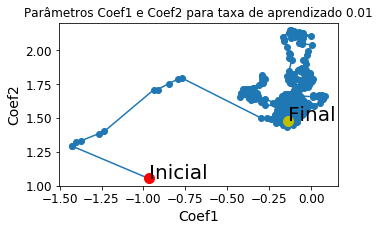

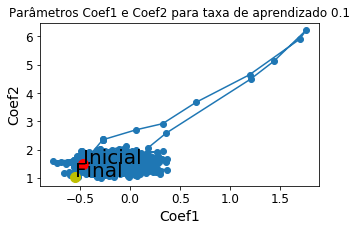

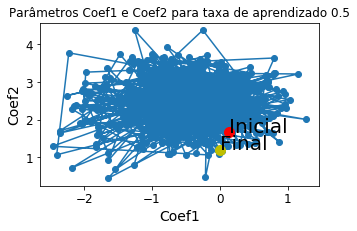

In [6]:
plot_parametros(clf_com_eta_pequeno, X1, y1)
plot_parametros(clf_com_eta_medio, X1, y1)
plot_parametros(clf_com_eta_grande, X1, y1)

## Descida de gradiente para dados do exemplo 2

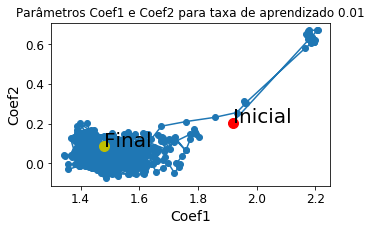

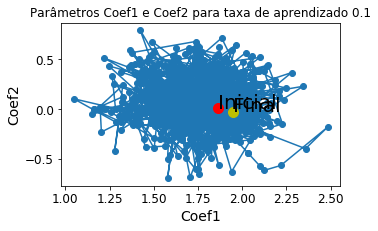

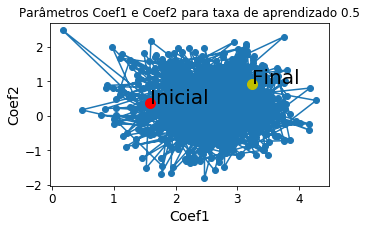

In [7]:
plot_parametros(clf_com_eta_pequeno, X2, y2)
plot_parametros(clf_com_eta_medio, X2, y2)
plot_parametros(clf_com_eta_grande, X2, y2)

## Descida de gradiente para dados do exemplo 3

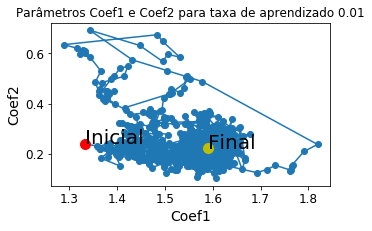

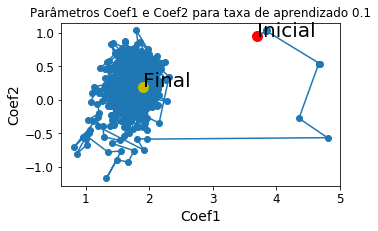

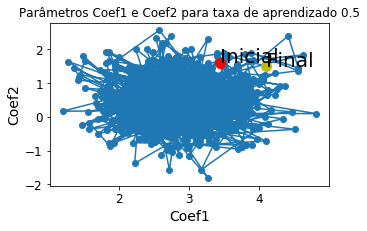

In [8]:
plot_parametros(clf_com_eta_pequeno, X3, y3)
plot_parametros(clf_com_eta_medio, X3, y3)
plot_parametros(clf_com_eta_grande, X3, y3)

## Descida de gradiente para dados do exemplo 4

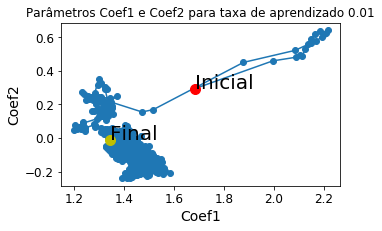

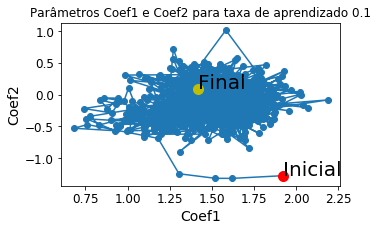

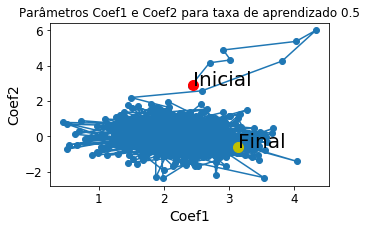

In [9]:
plot_parametros(clf_com_eta_pequeno, X4, y4)
plot_parametros(clf_com_eta_medio, X4, y4)
plot_parametros(clf_com_eta_grande, X4, y4)

## Comentários

Quando a taxa de aprendizado é adequada, os valores do parâmetros coef1 e coef2 tendem a se estabilizar em uma certa área ao longo das iterações.

Para as bases geradas, valores de taxa de aprendizado menores obtiveram o resultado melhor, enquanto taxas de aprendizado maiores não convergiram.